# SSB API: Create your own dataset - http POST eksempel

### How to use PxWebApi and the reccommended output format JSON-stat2 
We show the dataset Export of salmon by week using Matplotlib


 [pyjstat](https://pypi.org/project/pyjstat/) is a package made for the JSON-stat format, and includes Pandas as pd. (pip install pyjstat). requests is for http communication

In [1]:
import requests
from pyjstat import pyjstat

POST URL for the query. Only the URL returns metadata for the table. Here the table is Export of salmon

In [2]:
API_URL = 'https://data.ssb.no/api/v0/en/table/03024'

JSON query latest 53 weeks. Can be taken from [console](https://data.ssb.no/api/v0/en/console "PxWebApi console")

In [3]:
payload = {
    "query": [
        {
            "code": "VareGrupper2",
            "selection": {
                "filter": "item",
                "values": ["01","02"]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["Vekt", "Kilopris"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "top",
                "values": ["53"]
            }
        }
    ],
    "response": {
        "format": "json-stat2"
    }
}

POST payload

In [4]:
result = requests.post(API_URL, json = payload)

Print resultat returns only http status code. Should be 200 if OK.

In [5]:
print(result)

<Response [200]>


The rest of result is in the object dataset

In [6]:
dataset = pyjstat.Dataset.read(result.text)

In [7]:
type(dataset)

pyjstat.pyjstat.Dataset

The dataset is written to a Pandas dataframe.  

In [8]:
df = dataset.write('dataframe')

Information about the dataframe 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commodity group  212 non-null    object 
 1   contents         212 non-null    object 
 2   week             212 non-null    object 
 3   value            212 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.8+ KB


In [10]:
df.head()

,commodity group,contents,week,value
0,"Fish-farm bred salmon, fresh or chilled",Weight (tonnes),2023U46,24833.0
1,"Fish-farm bred salmon, fresh or chilled",Weight (tonnes),2023U47,22141.0
2,"Fish-farm bred salmon, fresh or chilled",Weight (tonnes),2023U48,22910.0
3,"Fish-farm bred salmon, fresh or chilled",Weight (tonnes),2023U49,22243.0
4,"Fish-farm bred salmon, fresh or chilled",Weight (tonnes),2023U50,24551.0


In [11]:
#frekvens, frek_no, freq_en = findfreq(df)

In [12]:
df.tail(2)

,commodity group,contents,week,value
210,"Fish-farm bred salmon, frozen",Price per kilo (NOK),2024U45,78.44
211,"Fish-farm bred salmon, frozen",Price per kilo (NOK),2024U46,83.02


Use of plot in Pandas. not a successful plot - why?

<Axes: xlabel='week'>

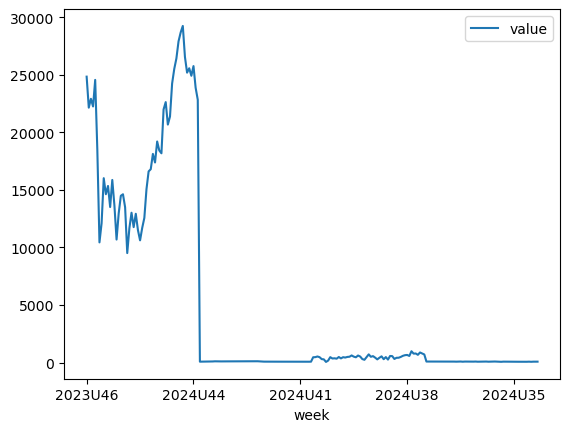

In [13]:
df.plot(x='week', y='value')

Make a dataframe with only prices, and not weight/tonnes

In [14]:
df_price = df[df['contents'] == 'Price per kilo (NOK)']


Det er to varegrupper fersk og frossen. Lager to plot med groupby 

commodity group
Fish-farm bred salmon, fresh or chilled    Axes(0.125,0.11;0.775x0.77)
Fish-farm bred salmon, frozen              Axes(0.125,0.11;0.775x0.77)
dtype: object

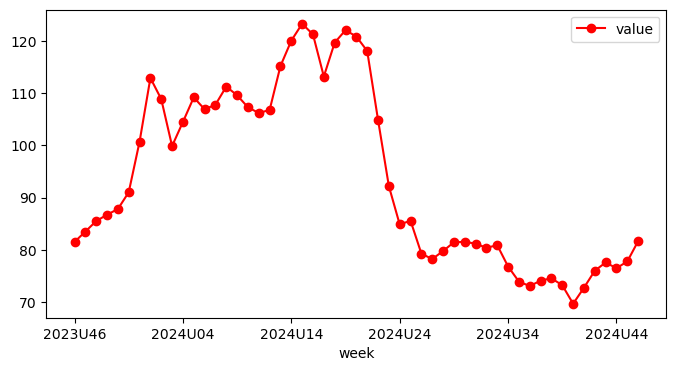

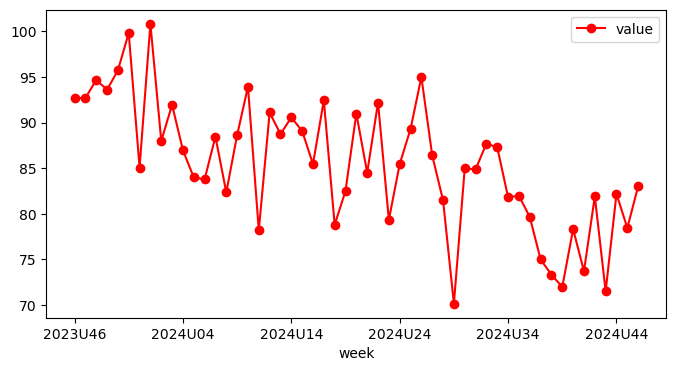

In [15]:
df_price.groupby('commodity group').plot(x='week', y='value', marker="o", color="r", figsize=(8, 4))

Make a dataframe only with price on fresh salmon

In [16]:
df_fresh = df_price[df_price['commodity group'] == 'Fish-farm bred salmon, fresh or chilled']

In [17]:
df_fresh.head(2)

,commodity group,contents,week,value
53,"Fish-farm bred salmon, fresh or chilled",Price per kilo (NOK),2023U46,81.52
54,"Fish-farm bred salmon, fresh or chilled",Price per kilo (NOK),2023U47,83.51


<Axes: title={'center': 'Fish-farm bred salmon, fresh or chilled. Price per kilo (NOK)'}, xlabel='week'>

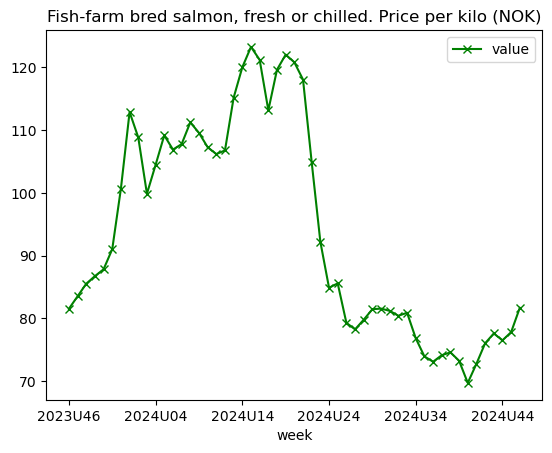

In [18]:
df_fresh.plot(x='week', y='value', marker="x", color="g", title= "Fish-farm bred salmon, fresh or chilled. Price per kilo (NOK)")